In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
df = pd.read_csv('Ames Housing Data Encoding.csv')

In [3]:
df = df[['SalePrice','Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF','1st Flr SF', 'Gr Liv Area', 'Garage Area']]

In [4]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [5]:
X

,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area
0,1960,1960,112.0,1080.0,1656,1656,528.0
1,1961,1961,0.0,882.0,896,896,730.0
2,1958,1958,108.0,1329.0,1329,1329,312.0
3,1968,1968,0.0,2110.0,2110,2110,522.0
4,1997,1998,0.0,928.0,928,1629,482.0
...,...,...,...,...,...,...,...
2846,1984,1984,0.0,1003.0,1003,1003,588.0
2847,1983,1983,0.0,864.0,902,902,484.0
2848,1992,1992,0.0,912.0,970,970,0.0
2849,1974,1975,0.0,1389.0,1389,1389,418.0


In [27]:
# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LassoCV

In [29]:
model = LassoCV()

In [30]:
model.fit(X_train, y_train)

LassoCV()

In [31]:
model.alpha_

49.74160633124341

In [32]:
y_pred = model.predict(X_test)

In [47]:
y_pred

array([184914.74230959, 158015.71513546, 109639.560176  , 204352.34523564,
       294836.16260241, 283071.63384276, 202932.33520897, 220691.42589468,
       148973.10641789, 119490.18367013, 312469.14818499, 118729.22814596,
       160414.16243164,  91037.08154932, 155614.55731298, 266257.35545248,
       208472.53095301, 198874.95998064,  87962.3151829 , 158817.07134092,
       306989.12648137, 122279.65673188, 268328.03816474, 179244.71778545,
       208297.73049195, 100350.44082915, 290021.79947833, 194653.0056612 ,
       106506.12231253, 257436.69601959, 104735.4823708 , 138678.81235926,
       260425.92318128, 308150.38665327,  68582.97179081, 191079.01702247,
       182548.83936427, 176197.50224057, 188386.06101559, 235076.01981011,
       149251.10299985, 271337.97299136, 218972.27388459, 186656.88629877,
       265744.4804059 , 101220.14922448, 220494.92786497, 182095.99783288,
        54759.33287178, 106626.12853853, 122964.11209159, 207869.10797093,
       196486.38579794, 2

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
mean_squared_error(y_test,y_pred)

972462548.1303244

In [35]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [36]:
100*RMSE/df['SalePrice'].mean()

17.589774267044206

In [37]:
test_pred = y_test - y_pred

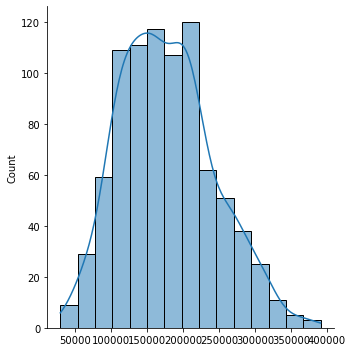

In [38]:
sns.displot(y_pred,bins=15,kde=True)

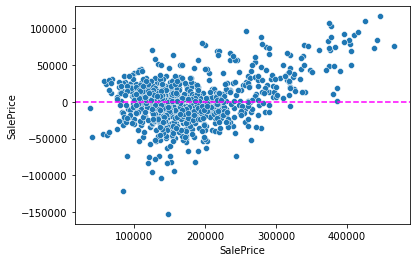

In [39]:
sns.scatterplot(x=y,y=test_pred)
plt.axhline(y=0,color='magenta',linestyle='--')

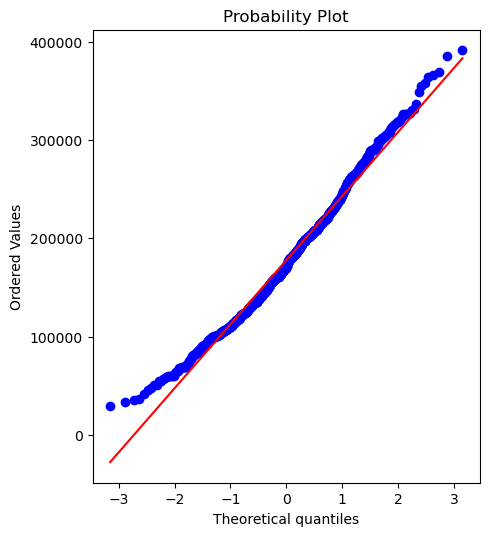

In [40]:
fig,ax = plt.subplots(figsize=(5,6),dpi=100)

_=sp.stats.probplot(y_pred,plot=ax)

In [41]:
model.coef_

array([13763.75240123, 12399.52159502,  6855.36873384, 16520.15679669,
        2679.0437087 , 27400.37324442, 11670.55766998])

**Save Model**

In [43]:
from joblib import dump, load

In [44]:
dump(scaler,"Ames_Housing_scaler.pkl")

['Ames_Housing_scaler.pkl']

In [46]:
dump(model,"Ames_Housing_model.h5")

['Ames_Housing_model.h5']